In [1]:
from mdcrow import MDCrow
import os 
import mdtraj as md

In [2]:
descriptive_prompt_7 =  "Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Tell me how many residues are in the chains and beta sheets. 3. Find any known binding or active sites. 4. Simulate for 1 ps at 300 K. 5. Compute the RMSD. 6. Compute the radius of gyration over time. 7. Compute the SASA (solvent accessible surface area)."
non_descriptive_prompt_7 = "Simulate 1LYZ for 1 ps at 300 K. Tell me how many residues are in the chains and beta sheets and any known binding or active sites. Compute the RMSD, SASA, and radius of gyration of the simulation."

Required Tasks:
- Download
- SS Analysis
- Simulation
- RMSD
- Rgy
- SASA
- Binding/Active Sites

In [3]:
llm_model = "claude-3-5-sonnet-20240620"
tools = "all"

In [4]:
agent_1 = MDCrow(agent_type="Structured", model=llm_model, top_k_tools=tools)
agent_1.run(descriptive_prompt_7)

Thought: To complete all the tasks, I'll need to use multiple tools in sequence. Let's start with downloading the PDB file 1LYZ.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```PDB file found with this ID: 1LYZ
Thought: Great, we've successfully downloaded the PDB file for 1LYZ. Now, let's analyze the structure to determine the number of residues in the chains and beta sheets.

Action:
```
{
    "action": "ComputeDSSP",
    "action_input": {
        "traj_file": "1LYZ_005012",
        "top_file": "1LYZ_005012",
        "target_frames": "first"
    }
}
```Thought: We've obtained information about the secondary structure of 1LYZ. Now, let's find any known binding or active sites for this protein.

Action:
```
{
    "action": "GetUniprotID",
    "action_input": "1LYZ"
}
```Thought: We've obtained the UniProt ID for 1LYZ. Now, let's use this ID to find the known binding or active sites for this protein.

Action:
```
{
    "action": "GetAllKnownSites",
    

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [5]:
registry = agent_1.path_registry
print(registry.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_005012: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_005012
 rec0_005016: dssp values for trajectory with id: 1LYZ_005012
 1LYZ_005036: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_005043: Initial positions for simulation sim0_005043
 sim0_005043: Basic Simulation of Protein 1LYZ_005036
 rec0_005044: Simulation trajectory for protein 1LYZ_005036 and simulation sim0_005043
 rec1_005044: Simulation state log for protein 1LYZ_005036 and simulation sim0_005043
 rec2_005044: Simulation pdb frames for protein 1LYZ_005036 and simulation sim0_005043
 rmsd_005043: RMSD for 005043
 fig0_005206: RMSD plot for 005043
 rgy_rec0_005044: Radii of gyration per frame for rec0_005044
 sasa_1LYZ: Total SASA values for 1LYZ
 fig0_005412: Plot of SASA over time for 1LYZ


In [6]:
traj_path = registry.get_mapped_path("rec0_005016")
top_path = registry.get_mapped_path("top_sim0_005043")

assert os.path.exists(traj_path)
assert os.path.exists(top_path)
assert os.path.exists(registry.get_mapped_path("rmsd_005043"))
assert os.path.exists(registry.get_mapped_path("rgy_rec0_005044"))
assert os.path.exists(registry.get_mapped_path("sasa_1LYZ"))
path = registry.get_mapped_path("1LYZ_005036")
traj = md.load(path)
#get dssp 
number_of_chains = traj.n_chains
secondary_structure = md.compute_dssp(traj,simplified=True)
print("Number of chains: ",number_of_chains)
print("Number of sheets: ",len([i for i in secondary_structure[0] if i == 'E']))
print("Number of helices: ",len([i for i in secondary_structure[0] if i == 'H']))
print("Number of coils: ",len([i for i in secondary_structure[0] if i == 'C']))

Number of chains:  1
Number of sheets:  14
Number of helices:  50
Number of coils:  65


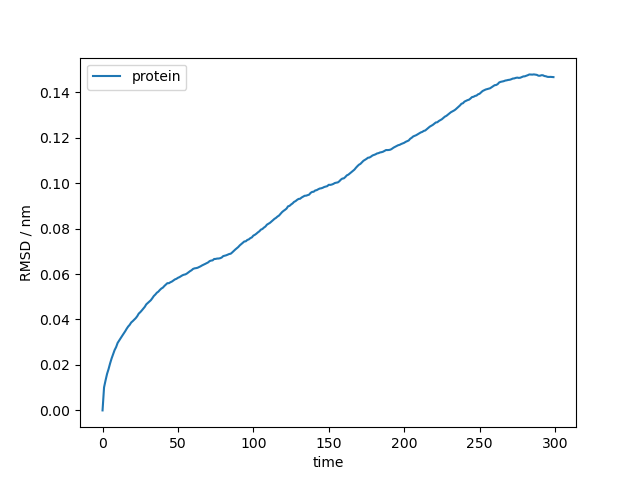

In [7]:
#plot rmsd
from IPython.display import Image
Image(filename=registry.get_mapped_path('fig0_005206'))

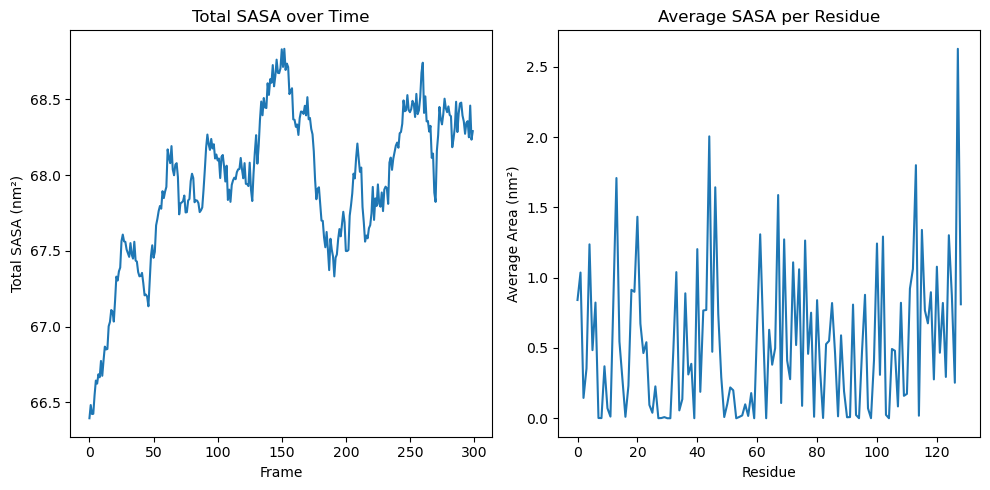

In [8]:
Image(filename=registry.get_mapped_path('fig0_005412'))

In [9]:
agent_2 = MDCrow(agent_type="Structured", model=llm_model, top_k_tools=tools)
agent_2.run(non_descriptive_prompt_7)

Thought: To answer this question comprehensively, I need to break it down into several steps. First, I'll download the PDB file for 1LYZ, then set up and run a simulation. After that, I'll analyze the protein structure and the simulation results. Let's start by downloading the PDB file.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```PDB file found with this ID: 1LYZ
Thought: Great, we have successfully downloaded the PDB file for 1LYZ. Now, let's set up and run a short simulation for 1 ps at 300 K.

Action:
```
{
    "action": "SetUpandRunFunction",
    "action_input": {
        "pdb_id": "1LYZ_005733",
        "forcefield_files": ["amber14-all.xml", "amber14/tip3pfb.xml"],
        "system_params": {
            "nonbondedMethod": "PME",
            "nonbondedCutoff": "1 * nanometers",
            "constraints": "HBonds",
            "rigidWater": true,
            "ewaldErrorTolerance": 0.0005,
            "constraintTolerance": 0.000001
        },
 

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [11]:
registry = agent_2.path_registry
print(registry.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_005733: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_005733
 1LYZ_005746: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_005753: Initial positions for simulation sim0_005753
 sim0_005753: Basic Simulation of Protein 1LYZ_005746
 rec0_005753: Simulation trajectory for protein 1LYZ_005746 and simulation sim0_005753
 rec1_005753: Simulation state log for protein 1LYZ_005746 and simulation sim0_005753
 rec2_005753: Simulation pdb frames for protein 1LYZ_005746 and simulation sim0_005753
 rmsd_005753: RMSD for 005753
 fig0_010302: RMSD plot for 005753
 sasa_1LYZ: Total SASA values for 1LYZ
 fig0_011007: Plot of SASA over time for 1LYZ
 rgy_rec0_005753: Radii of gyration per frame for rec0_005753
 fig0_011014: Plot of radii of gyration over time for rec0_005753


In [12]:
traj_path = registry.get_mapped_path("rec0_005753")
top_path = registry.get_mapped_path("top_sim0_005753")

assert os.path.exists(traj_path)
assert os.path.exists(top_path)
assert os.path.exists(registry.get_mapped_path("rmsd_005753"))
assert os.path.exists(registry.get_mapped_path("rgy_rec0_005753"))
assert os.path.exists(registry.get_mapped_path("sasa_1LYZ"))
path = registry.get_mapped_path("1LYZ_005746")
traj = md.load(path)
#get dssp 
number_of_chains = traj.n_chains
secondary_structure = md.compute_dssp(traj,simplified=True)
print("Number of chains: ",number_of_chains)
print("Number of sheets: ",len([i for i in secondary_structure[0] if i == 'E']))
print("Number of helices: ",len([i for i in secondary_structure[0] if i == 'H']))
print("Number of coils: ",len([i for i in secondary_structure[0] if i == 'C']))

Number of chains:  1
Number of sheets:  14
Number of helices:  50
Number of coils:  65


In [18]:
from mdcrow.tools.base_tools import SummarizeProteinStructure

summarizer = SummarizeProteinStructure(registry)
summarizer._run(traj_file = "rec0_005753", top_file = "top_sim0_005753")

"{'n_atoms': 1960, 'n_residues': 129, 'n_chains': 1, 'n_frames': 300, 'n_bonds': 1984}"

In [20]:
from mdcrow.tools.base_tools import GetTurnsBetaSheetsHelices

get_turns_beta = GetTurnsBetaSheetsHelices()
get_turns_beta._run(query = "1LYZ", primary_accession = "P00698")

"Turns: [{'start': 33, 'start_modifier': 'EXACT', 'end': 37, 'end_modifier': 'EXACT', 'evidences': [{'evidenceCode': 'ECO:0007829', 'source': 'PDB', 'id': '2HSO'}]}, {'start': 72, 'start_modifier': 'EXACT', 'end': 75, 'end_modifier': 'EXACT', 'evidences': [{'evidenceCode': 'ECO:0007829', 'source': 'PDB', 'id': '2VB1'}]}, {'start': 78, 'start_modifier': 'EXACT', 'end': 81, 'end_modifier': 'EXACT', 'evidences': [{'evidenceCode': 'ECO:0007829', 'source': 'PDB', 'id': '2VB1'}]}, {'start': 133, 'start_modifier': 'EXACT', 'end': 135, 'end_modifier': 'EXACT', 'evidences': [{'evidenceCode': 'ECO:0007829', 'source': 'PDB', 'id': '2VB1'}]}, {'start': 142, 'start_modifier': 'EXACT', 'end': 144, 'end_modifier': 'EXACT', 'evidences': [{'evidenceCode': 'ECO:0007829', 'source': 'PDB', 'id': '2VB1'}]}]\nBeta sheets: [{'start': 55, 'start_modifier': 'EXACT', 'end': 57, 'end_modifier': 'EXACT', 'evidences': [{'evidenceCode': 'ECO:0007829', 'source': 'PDB', 'id': '2HS7'}]}, {'start': 61, 'start_modifier'

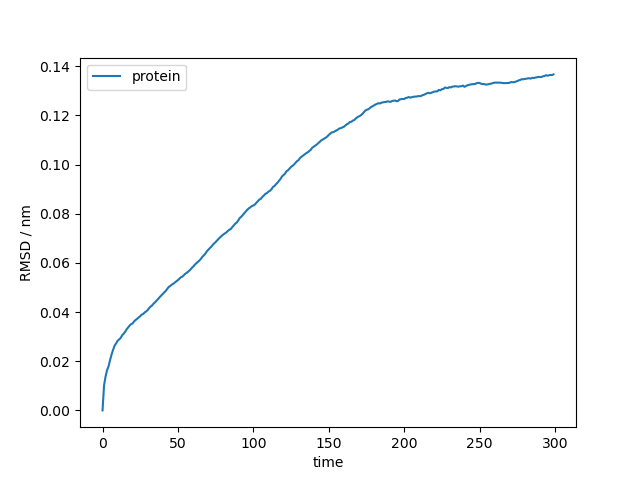

In [14]:
#plot rmsd
from IPython.display import Image
Image(filename=registry.get_mapped_path('fig0_010302'))

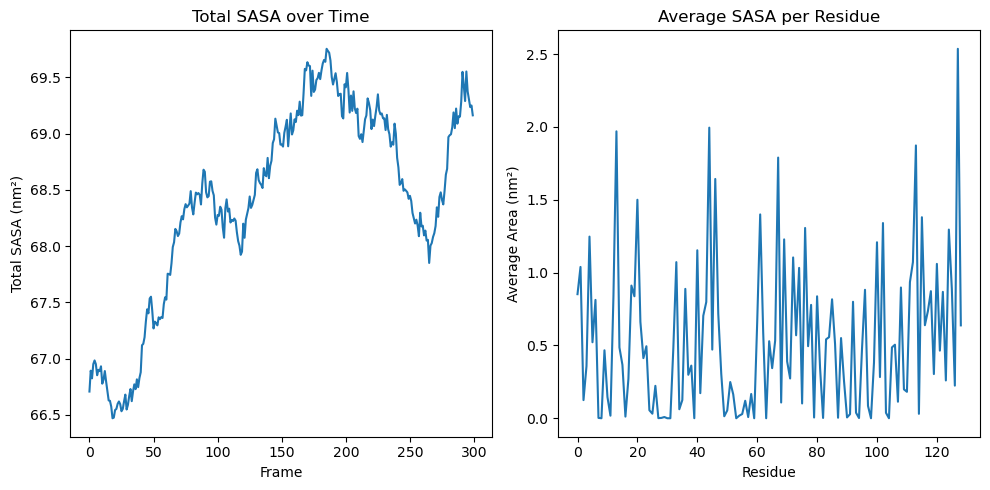

In [21]:
Image(filename=registry.get_mapped_path('fig0_011007'))